 ### Basic Trading System 
 We implement a basic trading system, which can be used for backtesting algorithmic trading strategies.
 To start create a new instance of ```TradingSystem()```.
 The basic functionality is as follow:
* Add financial data to the data feed using `TradingSystem.AddData(ticker,startDate,endDate)`. Currently the data is provided only using ```yahooFinance```.

* Set a strategy to be used in the backtesting process. A new strategy can be defined by  inheriting  from `Strategy` and overwriting `OnBar()`.
* Set the initial amount of money available in the portfolio using `TradingSystem.portfolio.SetInitialCash(cash)`.
* Perform a backtest of the strategy, using the given data, with `TradingSystem.Run()`.

* Analyze the backtest using various statistics, which are provided by `TradingSystem.GetStats()`.



In [1]:
from TradingSystem import *
# Ignore panda warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
100%|██████████| 2019/2019 [00:00<00:00, 20625.01it/s]


2015-01-02 00:00:00 buy order created
2015-01-05 00:00:00 sell order created
2015-01-06 00:00:00 buy order created
2015-01-07 00:00:00 sell order created
2015-01-08 00:00:00 buy order created
2015-01-09 00:00:00 sell order created
2015-01-12 00:00:00 buy order created
2015-01-13 00:00:00 sell order created
2015-01-14 00:00:00 buy order created
2015-01-15 00:00:00 sell order created
2015-01-16 00:00:00 buy order created
2015-01-20 00:00:00 sell order created
2015-01-21 00:00:00 buy order created
2015-01-22 00:00:00 sell order created
2015-01-23 00:00:00 buy order created
2015-01-26 00:00:00 sell order created
2015-01-27 00:00:00 buy order created
2015-01-28 00:00:00 sell order created
2015-01-29 00:00:00 buy order created
2015-01-30 00:00:00 sell order created
2015-02-02 00:00:00 buy order created
2015-02-03 00:00:00 sell order created
2015-02-04 00:00:00 buy order created
2015-02-05 00:00:00 sell order created
2015-02-06 00:00:00 buy order created
2015-02-09 00:00:00 sell order created

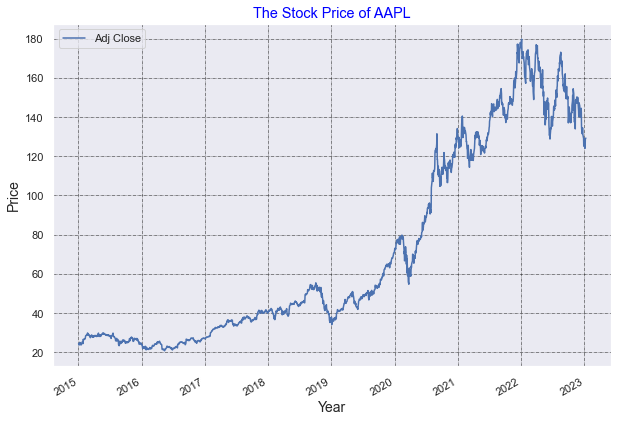

Text(0.5, 1.0, 'Portfolio value over time')

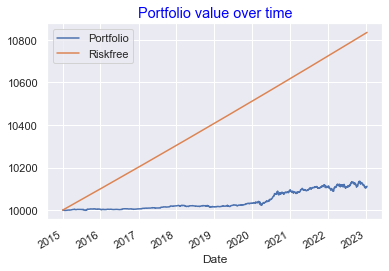

In [2]:


# Load Apple data from Jan 1,2015 to Jan 10, 2023
ticker = 'AAPL'
startDate = "2015-01-01"
endDate = "2023-01-10"



# Initialize the trading system
trader = TradingSystem()
# Add the Apple data to the trading system
trader.AddData(ticker, startDate, endDate)
# Set the strategy of the trading system to a naive strategy
# where we buy on one day and sell on the next day
trader.SetStrategy(BasicStrategy())
# The portfolio starts with $10000 
trader.portfolio.SetInitialCash(10000)


 
 # Perform a backtest for the basic trading strategy  
trader.Run()

# Analyze the backtest by providing various statistics
print(trader.GetStats())



print('Starting Portfolio Value: %.2f' % trader.portfolio.initialCash)
print('Final Portfolio Value: %.2f' % trader.portfolio.cash)
PlotStockData(ticker, (trader.datas[ticker])['Adj Close'])

trader.log.plot()
plt.title("Portfolio value over time",size='x-large',color='blue')

### Simple moving average crossing
We now implement a basic simple moving average crossing strategy, where we calculate two moving averages, one over a 10day window (the fast window) and one over a 30day window(the slow window).
At every day we compute the slope of the moving average as an indicator for the direction of the stock price.
If the fast moving average crosses upwards through the slow moving average we produce a buy signal and vice versa, if the fast moving averages drosses downwards we produce a sell  signal.


In [12]:
# Load Microsoft data from Jan 01, 2021 to Jan 10, 2021
ticker = 'MSFT'
startDate = "2015-01-01"
endDate = "2018-12-31"

trader = TradingSystem()
# Load the Microsoft data ino the trading system
trader.AddData(ticker, startDate, endDate)
# Set the strategy to the simple moving average crossing strategy
trader.SetStrategy(SMACross())
trader.portfolio.SetInitialCash(10000)

   
trader.Run()
print(trader.portfolio)
print(trader.GetStats())



print('Starting Portfolio Value: %.2f' % trader.portfolio.initialCash)
print('Final Portfolio Value: %.2f' % trader.GetPortfolioValue())

[*********************100%%**********************]  1 of 1 completed
 17%|█▋        | 168/1005 [00:00<00:01, 836.77it/s]

2015-01-26 00:00:00 buy order created
2015-02-12 00:00:00 sell order created
2015-03-11 00:00:00 buy order created
2015-04-23 00:00:00 sell order created
2015-05-07 00:00:00 buy order created
2015-07-20 00:00:00 sell order created
2015-08-20 00:00:00 buy order created
2015-09-04 00:00:00 sell order created


 34%|███▎      | 337/1005 [00:00<00:00, 839.97it/s]

2015-11-06 00:00:00 buy order created
2016-01-29 00:00:00 sell order created
2016-02-11 00:00:00 buy order created
2016-02-19 00:00:00 sell order created
2016-04-21 00:00:00 buy order created
2016-05-11 00:00:00 sell order created
2016-06-10 00:00:00 buy order created
2016-07-08 00:00:00 sell order created


 75%|███████▍  | 751/1005 [00:00<00:00, 737.47it/s]

2017-06-15 00:00:00 buy order created
2017-07-13 00:00:00 sell order created
2017-08-01 00:00:00 buy order created
2017-10-11 00:00:00 sell order created
2017-11-09 00:00:00 buy order created
2017-12-15 00:00:00 sell order created


 91%|█████████ | 910/1005 [00:01<00:00, 765.76it/s]

2018-02-02 00:00:00 buy order created
2018-02-16 00:00:00 sell order created
2018-03-21 00:00:00 buy order created
2018-04-06 00:00:00 sell order created
2018-05-01 00:00:00 buy order created
2018-05-08 00:00:00 sell order created
2018-06-14 00:00:00 buy order created
2018-07-09 00:00:00 sell order created
2018-08-03 00:00:00 buy order created
2018-08-30 00:00:00 sell order created


100%|██████████| 1005/1005 [00:01<00:00, 788.43it/s]

2018-10-03 00:00:00 buy order created
2018-10-24 00:00:00 sell order created
2018-10-29 00:00:00 buy order created
2018-11-06 00:00:00 sell order created
2018-11-19 00:00:00 buy order created
2018-11-27 00:00:00 sell order created
2018-12-12 00:00:00 buy order created
Portfolio: 
Cash value: 9916.33999633789
Ticker:MSFT, Size:1

{'Total Return': 0.16729995727537972, 'Volatility': 0.0006574331526010706, 'Average Return': 0.0008529210985477873, 'Riskfree Return': 0.040668304714246185, 'Sharpe': -60.56187379381872}
Starting Portfolio Value: 10000.00
Final Portfolio Value: 10016.73


### Backtrader cross check
To cross check our backtest we compare it to a backtest of a SMA crossover strategy with backtrader (with the same fast and slow window). The results show a small discrepancy due to our slightly different implementation of crossovers.


[*********************100%%**********************]  1 of 1 completed

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10028.65


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 5 Axes>]]

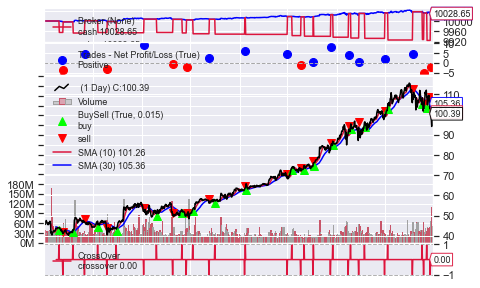

In [11]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.PandasData(dataname=yf.download("MSFT", 
                                            start="2015-01-01", 
                                            end="2018-12-31"))


cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.broker.setcash(10000.0)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

  
   

cerebro.run()  # run it all
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.plot()  # and plot it with a single command

### Analysis of pairs
Given a pair of assets (here we compare Bitcoin and Ethereum) we analyze the spread over time to determine a basic trading in pair strategy. We compare the simple and exponential moving average.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


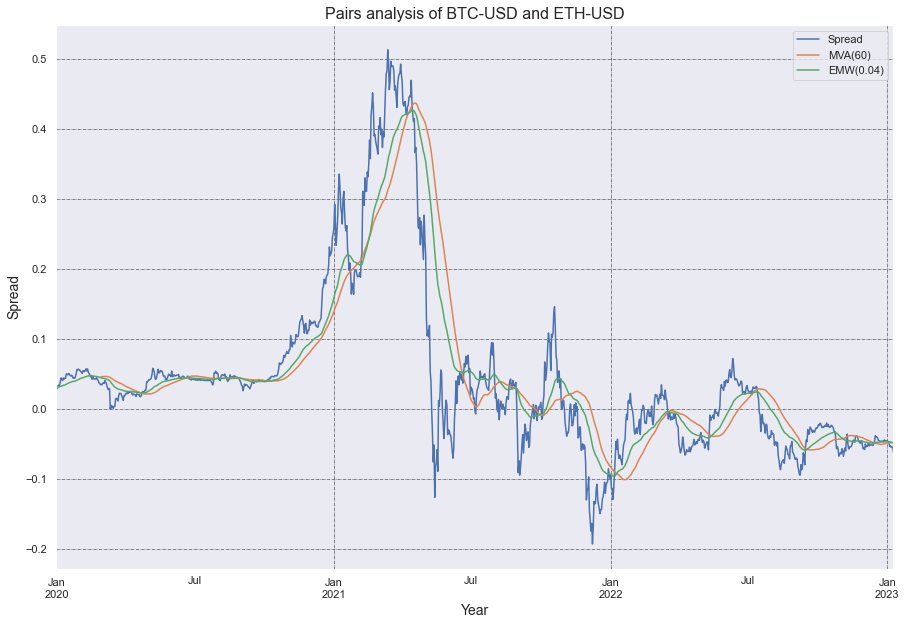

In [4]:


#  Given a pair of two assets, computes  the spread as well as  moving average and exponential moving average of the spread

def plotPairAnalysis(ticker1, ticker2, startDate,endDate):

    data = pd.DataFrame(columns=[ticker1, ticker2])
    tickers = [ticker1, ticker2]
    # Collect the data of both tickers and then normalize the data to the range [0,1] using MaxMin normalization
    for ticker in tickers:
        data[ticker] = yf.download(ticker, 
                                startDate,
                                endDate)['Adj Close']
        data[ticker + 'N'] = (data[ticker] - data[ticker].min()) / (data[ticker].max() - data[ticker].min())  

   
    # Compute the (linear) spread by taking the difference of the values
    data['Spread'] = data[ticker1 + 'N'] - data[ticker2 + 'N']
    # Compute moving average and exponential moving average
    data['MVA(60)'] = data['Spread'].rolling(window=60).mean() 
    data['EMW(0.04)'] = data['Spread'].ewm(alpha=0.04, adjust=False).mean()
    # Plot spread, moving average and exponential moving average in the same plot
    data[['Spread', 'MVA(60)','EMW(0.04)']].plot(figsize=(15, 10))
    # Show the legend
    plt.legend()
    # Define the label for the title of the figure
    plt.title("Pairs analysis of {} and {}".format(ticker1, ticker), fontsize=16)
    # Define the labels for x-axis and y-axis
    plt.ylabel('Spread', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    # Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()





tickers= ["BTC-USD", "ETH-USD"]

startDate = "2020-01-01"
endDate = "2023-01-10"

plotPairAnalysis(tickers[0], tickers[1],startDate,endDate)